In [1]:
import os
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import skimage.metrics
import cv2

In [4]:
def cr(original_img, compressed_img):
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    compressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)

    original_img=cv2.imwrite("original.png", original_img)
    
    compressed_img=cv2.imwrite("compressed.png", compressed_img)

    return round(os.path.getsize("original.png")/os.path.getsize("compressed.png"), 3)
   
# Calculating the 3 metrics for different PCA components
ssim_vals = []
psnr_vals = []
cr_vals = []

for pca_comp in range(17):
    folder_dir = "/home/abhishek/Desktop/ucsd_fall_2022/DSC210/project/kodak/"

    images_gray = []

    homes_ind = -1
    count = 0

    for img in os.listdir(folder_dir):
        if (img.endswith(".png")):
            image = plt.imread(folder_dir + img)
            if (img.endswith("08.png")):
                homes_ind = count

            image = np.reshape(image, (image.shape[0]*image.shape[1], -1))

            images_gray.append(image)
            count += 1

    images_gray = np.stack(images_gray, axis = 0)
    #images_gray = images_gray[:20, :, :]
    images_gray_copy = np.copy(images_gray)
    
    images_red = images_gray[:,:,0]
    images_green = images_gray[:,:,1]
    images_blue = images_gray[:,:,2]
    
    pca_red = PCA(n_components=pca_comp)
    img_reduced_red = pca_red.fit_transform(images_red)
    img_recovered_red = pca_red.inverse_transform(img_reduced_red)

    pca_green = PCA(n_components=pca_comp)
    img_reduced_green = pca_green.fit_transform(images_green)
    img_recovered_green = pca_green.inverse_transform(img_reduced_green)

    pca_blue = PCA(n_components=pca_comp)
    img_reduced_blue = pca_blue.fit_transform(images_blue)
    img_recovered_blue = pca_blue.inverse_transform(img_reduced_blue)

    recovered_imgs = np.stack([img_recovered_red, img_recovered_green, img_recovered_blue], axis = 2)

    psnr = skimage.metrics.peak_signal_noise_ratio(images_gray_copy[homes_ind,:, :].reshape([512, 768, 3]), recovered_imgs[homes_ind,:,:].reshape([512, 768, 3]))
    psnr_vals.append(psnr)

    ssim = skimage.metrics.structural_similarity(images_gray_copy[homes_ind,:, :].reshape([512, 768, 3]), recovered_imgs[homes_ind,:,:].reshape([512,768,3]), channel_axis = 2)
    ssim_vals.append(ssim)
    
    comp_rat = cr(images_gray_copy[homes_ind,:, :].reshape([512, 768, 3]), recovered_imgs[homes_ind,:,:].reshape([512,768,3]))
    cr_vals.append(comp_rat)
    

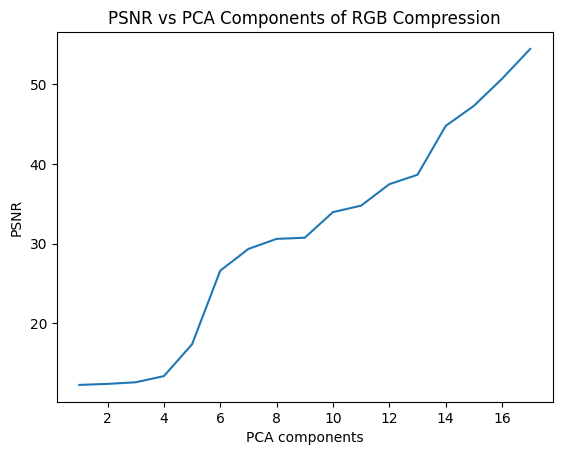

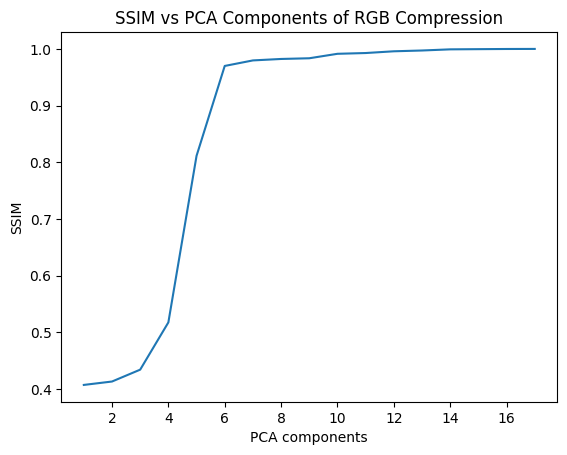

In [5]:
# Visualizing the graph for PSNR, SSIM and CR
comp_list = [i+1 for i in range(17)]

# plot PSNR vs components
fig, ax = plt.subplots()
ax.plot(comp_list, psnr_vals)
ax.set(xlabel='PCA components', ylabel='PSNR',
       title='PSNR vs PCA Components of RGB Compression')
plt.show()

# plot SSIM vs components
fig, ax = plt.subplots()
ax.plot(comp_list, ssim_vals)
ax.set(xlabel='PCA components', ylabel='SSIM',
       title='SSIM vs PCA Components of RGB Compression')
plt.show()

# plot CR vs components
fig, ax = plt.subplots()
ax.plot(comp_list, cr_vals)
ax.set(xlabel='PCA components', ylabel='CR',
       title='CR vs PCA Components of RGB Compression')
plt.show()

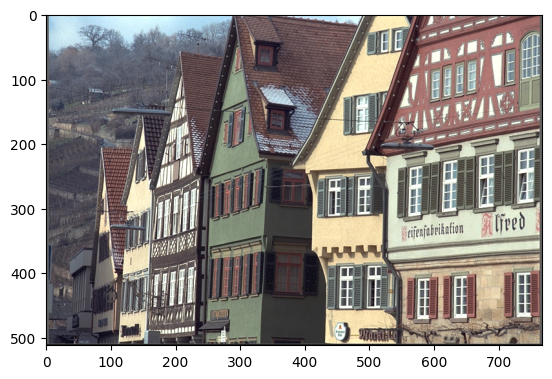

In [25]:
# Visualizing one image and getting values
source_img = images_gray[homes_ind,:].reshape([512,768,3])
plt.imshow(source_img)
images_red = images_gray[:,:,0]
images_green = images_gray[:,:,1]
images_blue = images_gray[:,:,2]

In [26]:
# Performing PCA on the Red component
pca_red = PCA(n_components=3)
img_reduced_red = pca_red.fit_transform(images_red)
img_recovered_red = pca_red.inverse_transform(img_reduced_red)

In [29]:
# Performing PCA on the green component
pca_green = PCA(n_components=3)
img_reduced_green = pca_green.fit_transform(images_green)
img_recovered_green = pca_green.inverse_transform(img_reduced_green)

In [30]:
# Performing PCA on the blue component
pca_blue = PCA(n_components=3)
img_reduced_blue = pca_blue.fit_transform(images_blue)
img_recovered_blue = pca_blue.inverse_transform(img_reduced_blue)

In [31]:
# Restoring the recovered images from the 3 channels.
recovered_imgs = np.stack([img_recovered_red, img_recovered_green, img_recovered_blue], axis = 2)

(18, 393216)
(18, 393216, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


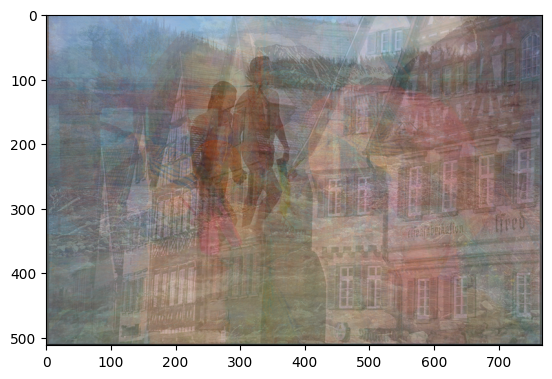

In [32]:
rec_img = recovered_imgs[homes_ind,:].reshape([512,768,3])
plt.imshow(rec_img)

In [33]:
# Getting PSNR and SSIM values of the recovered image

psnr = skimage.metrics.peak_signal_noise_ratio(images_gray_copy[homes_ind,:, :].reshape([512, 768, 3]), rec_img)
print(psnr)

ssim = skimage.metrics.structural_similarity(images_gray_copy[homes_ind,:, :].reshape([512, 768, 3]), rec_img, channel_axis = 2)
print(ssim)

13.360478880741367
0.5178024
